# Indonesia Earthquake

**This article is intended to:**

- Beginner Machine Learning model building
- Analyze datasets with simple visualizations
- Train Various Machine Learning Models to choose the most suitable one

**The Machine Learning models used are:**

1. XGB Classifier
2. K-Nearest Neighbors Classifier
3. AdaBoost Classifier

## Install Basemap 
Used for Map Visual Data

In [1]:
!pip install basemap
!pip install basemap-data

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


## Import Necessary Library

In [237]:
# Basic library
import numpy as np # Array handler
import pandas as pd # Data analysis
import seaborn as sns  #Visualization
import matplotlib.pyplot as plt #Visualization
import plotly.express as px 


# Preprocessing
from sklearn.preprocessing import LabelEncoder # Handling categorial features
from sklearn.preprocessing import MinMaxScaler # Features scaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import scipy

# Clustering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans # Clustering machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from xgboost import XGBClassifier

## Data Loading

Now let’s load and read the dataset. The dataset that I am using here can be easily

In [226]:
dfRaw = pd.read_csv('data/earthquaqe_id.csv')
dfRaw.columns

Index(['date', 'time', 'latitude', 'longitude', 'depth', 'magnitude'], dtype='object')

See the main characteristics of earthquake data and create an object of these characteristics, namely date, time, latitude, longitude, depth, magnitude

In [227]:
dfRaw.shape

(87372, 6)

In [228]:
dfRaw.head()

,date,time,latitude,longitude,depth,magnitude
0,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99
1,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51
2,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54
3,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42
4,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41


There are 6 Variables in this Dataset:

- 4 Continuous Variables.
- 2 Variable to accommodate the Date and Time.

## Data Cleaning 
### Checking Features Info

In [229]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87372 entries, 0 to 87371
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       87372 non-null  object 
 1   time       87372 non-null  object 
 2   latitude   87372 non-null  float64
 3   longitude  87372 non-null  float64
 4   depth      87372 non-null  float64
 5   magnitude  87372 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.0+ MB


### Checking Null Value in Each Features

In [230]:
dfRaw.isnull().sum()

date         0
time         0
latitude     0
longitude    0
depth        0
magnitude    0
dtype: int64

### Create New Feature: Earthquake Category

In [141]:
tempList = []
for i in dfRaw['magnitude'].tolist():
    tempVar = ''
    if (i<3):
        tempVar = 'Micro'
    elif (i<4):
        tempVar = 'Minor'
    elif (i<5):
        tempVar = 'Light'
    elif (i<6):
        tempVar = 'Moderate'
    elif (i<7):
        tempVar = 'Strong'
    elif (i<8):
        tempVar = 'Major'
    else:
        tempVar = 'Great'
    tempList.append(tempVar)
dfRaw['earthquakeCategory'] = tempList
dfRaw.head()

,date,time,latitude,longitude,depth,magnitude,earthquakeCategory
0,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99,Micro
1,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51,Moderate
2,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54,Minor
3,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42,Micro
4,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41,Micro


In [151]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87372 entries, 0 to 87371
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                87372 non-null  object 
 1   time                87372 non-null  object 
 2   latitude            87372 non-null  float64
 3   longitude           87372 non-null  float64
 4   depth               87372 non-null  float64
 5   magnitude           87372 non-null  float64
 6   earthquakeCategory  87372 non-null  object 
dtypes: float64(4), object(3)
memory usage: 4.7+ MB


## Data Pre-Processing:

In [158]:
# Converting the Dtype on date from object to datetime
dfRaw['date'] = pd.to_datetime(dfRaw['date'])

In [159]:
# Converting the Dtype on time from object to datetime
dfRaw['time'] = pd.to_datetime(dfRaw['time'])

In [160]:
# The column earthquakeCategory contains the data value in the string form and we need to predict the weather data 
# so we convert it to an int as label.
dfRaw['earthquakeCategory']=LabelEncoder().fit_transform(dfRaw['earthquakeCategory'])

In [161]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87372 entries, 0 to 87371
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                87372 non-null  datetime64[ns]
 1   time                87372 non-null  datetime64[ns]
 2   latitude            87372 non-null  float64       
 3   longitude           87372 non-null  float64       
 4   depth               87372 non-null  float64       
 5   magnitude           87372 non-null  float64       
 6   earthquakeCategory  87372 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 4.7 MB


Now we have a good dataframe to be processed

## Data Visualization

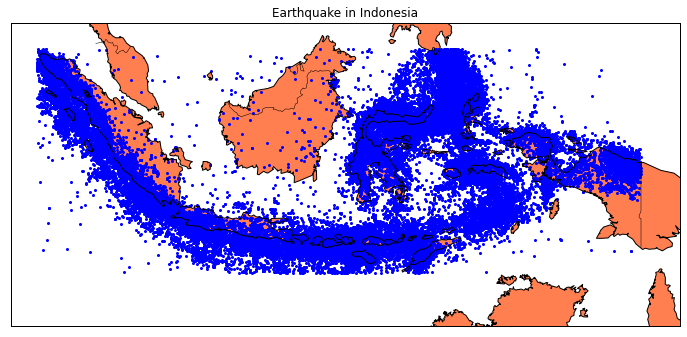

In [96]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-15,urcrnrlat=8, llcrnrlon=93,urcrnrlon=144,resolution='l')

longitudes = dfRaw["longitude"].tolist()
latitudes = dfRaw["latitude"].tolist()
            #m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("Earthquake in Indonesia")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

**Indonesia** is one of the countries that is traversed by the "Ring of Fire", so we can see that almost all land is threatened by an earthquake

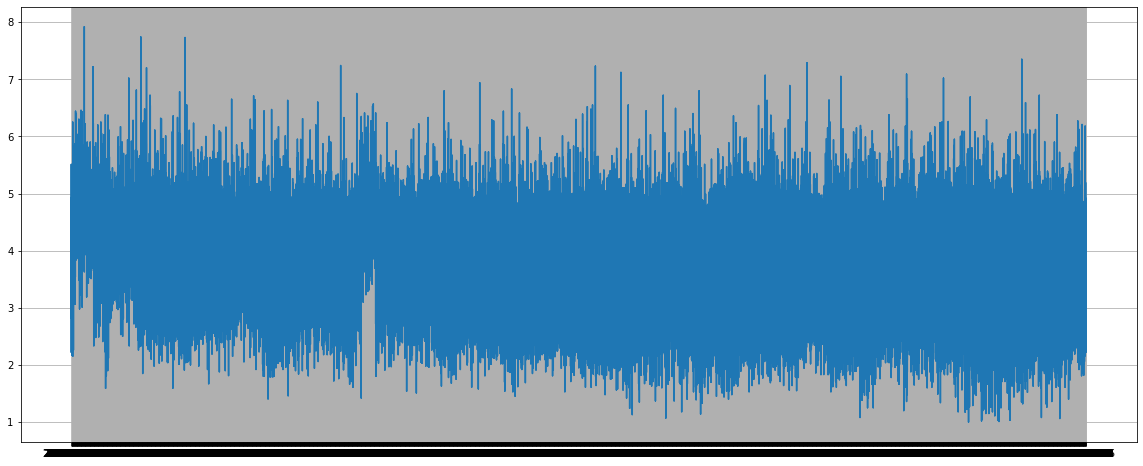

In [238]:
# Visualizing the magnitude, observing if there's abnormal data
plt.figure(figsize = (20, 8))
fig = plt.plot(dfRaw['date'], dfRaw['magnitude'])
plt.grid();

We can see there's a pattern of the magnitude every year, earthquakes occurred continuously between 2017-2022. The average strength of the earthquake is 4 SR and the highest number is almost close to 8 SR.

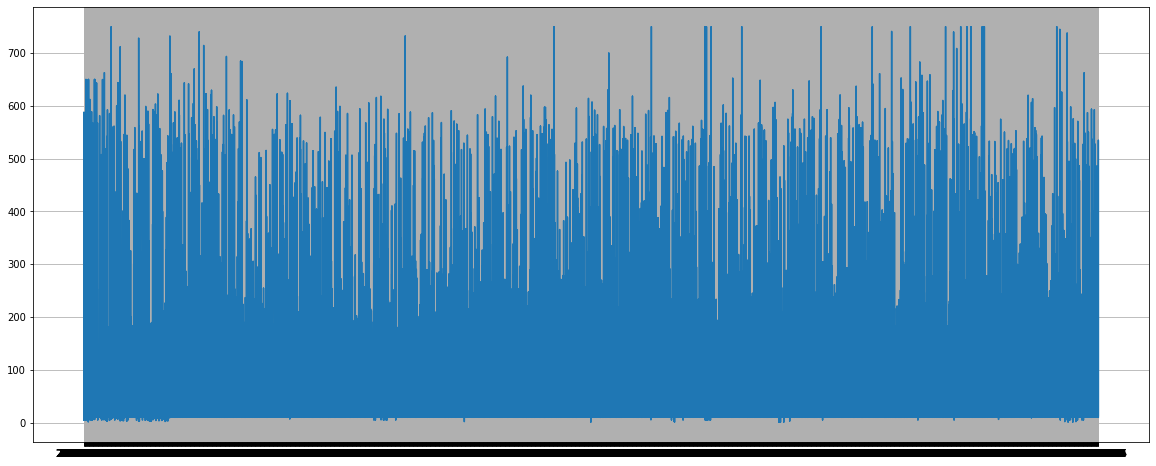

In [241]:
plt.figure(figsize = (20, 8))
fig2 = plt.plot(dfRaw['date'], dfRaw['depth'])
plt.grid();

The Max depth of an earthquake is at a depth of 700 up and Min depth is at a depth of 200. 

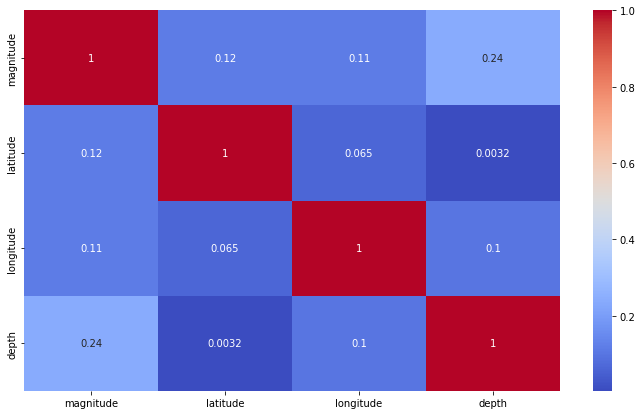

In [143]:
plt.figure(figsize=(12,7))
sns.heatmap(dfRaw[["magnitude","latitude","longitude","depth"]].corr(),annot=True,cmap='coolwarm' );

### Training Our Machine Learning Model:

In [209]:
features=["magnitude","latitude","longitude","depth"]
X=dfRaw[features]
y=dfRaw[['earthquakeCategory']]
X_train, X_test, y_train,y_test = train_test_split(X, y,random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(65529, 4) (21843, 4) (65529, 1) (21843, 1)


### XGB Classifier

In [210]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(X_test,y_test)*100))

XGB Accuracy:100.00%


### K-Nearest Neighbors Classifier

In [211]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

KNN Accuracy:82.31%


### AdaBoost Classifier

In [213]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
print("AB Accuracy:{:.2f}%".format(ab.score(X_test,y_test)*100))


AB Accuracy:70.87%


We achieved highest accuracy on **XGB Classifier** so we're going to use it

## Try Improving Our Model:
### GridSearchCV

In [214]:
xgb.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [215]:
parameters = {
    'learning_rate': [1, 2, 3],
    'n_estimators': [100, 500, 1000]
}

cv = GridSearchCV(ab, param_grid=parameters, scoring='f1_micro', n_jobs=-1, verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1_micro', verbose=3)

[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.710 total time=   5.8s
[CV 3/5] END .learning_rate=1, n_estimators=500;, score=0.710 total time=  28.5s
[CV 2/5] END learning_rate=1, n_estimators=1000;, score=0.710 total time=  56.5s
[CV 5/5] END learning_rate=1, n_estimators=1000;, score=0.710 total time=  56.1s
[CV 2/5] END learning_rate=2, n_estimators=1000;, score=0.968 total time=  55.9s
[CV 5/5] END learning_rate=2, n_estimators=1000;, score=1.000 total time=  56.1s
[CV 2/5] END learning_rate=3, n_estimators=1000;, score=1.000 total time=  55.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.710 total time=   5.8s
[CV 2/5] END .learning_rate=1, n_estimators=500;, score=0.710 total time=  28.5s
[CV 1/5] END learning_rate=1, n_estimators=1000;, score=0.710 total time=  57.0s
[CV 1/5] END .learning_rate=2, n_estimators=100;, score=0.968 total time=   5.5s
[CV 3/5] END .learning_rate=2, n_estimators=100;, score=0.968 total time=   5.6s
[CV 5/5] END .learning_rate=2, n_estimators=100;, score=0.511 total time=   5.6s
[CV 2/5] END .learning_rate=2, n_estimators=500;, score=0.968 total time=  28.1s
[CV 5/5] END .learning_rate=2, n_estimators=500;, score=0.998 total time=  28.1s
[CV 4/5] END learning_rate=2, n_estimators=1000;, score=0.968 total time=  56.2s
[CV 1/5] END .learning_rate=3, n_estimators=500;, score=1.000 total time=  28.2s
[CV 4/5] END .learning_rate=3, n_estimators=500;, score=1.000 total time=  28.2s
[CV 3/5] END learning_rate=3, n_estimators=1000;, score=1.000 total time=  54.7s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.710 total time=   5.5s
[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.710 total time=   5.5s
[CV 4/5] END .learning_rate=1, n_estimators=500;, score=0.710 total time=  28.6s
[CV 3/5] END learning_rate=1, n_estimators=1000;, score=0.710 total time=  56.5s
[CV 2/5] END .learning_rate=2, n_estimators=100;, score=0.968 total time=   5.6s
[CV 4/5] END .learning_rate=2, n_estimators=100;, score=0.968 total time=   5.6s
[CV 1/5] END .learning_rate=2, n_estimators=500;, score=0.968 total time=  28.0s
[CV 4/5] END .learning_rate=2, n_estimators=500;, score=0.968 total time=  28.2s
[CV 3/5] END learning_rate=2, n_estimators=1000;, score=0.968 total time=  56.0s
[CV 4/5] END .learning_rate=3, n_estimators=100;, score=1.000 total time=   5.5s
[CV 2/5] END .learning_rate=3, n_estimators=500;, score=1.000 total time=  27.9s
[CV 5/5] END .learning_rate=3, n_estimators=500;, score=1.000 total time=  27.8s
[CV 4/5] END learning_rate=3

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [217]:
GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1_micro', verbose=3)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1_micro', verbose=3)

In [218]:
#predicting values from GridSearchCV
y_pred = cv.predict(X_test)

# show classification report on test data
print(classification_report(y_test.values, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5672
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00      5675
           3       1.00      1.00      1.00      9803
           4       1.00      1.00      1.00       640
           5       1.00      1.00      1.00        51

    accuracy                           1.00     21843
   macro avg       1.00      1.00      1.00     21843
weighted avg       1.00      1.00      1.00     21843



we get a little improvement in our model using hyperparameter tuning

## Testing User Input:

In [220]:
input=[[2.42,-4.20,128.09700,5.0]]
ot = ab.predict(input)
print("The categorie is:")
if(ot<3):
    print("Micro")
elif(ot<4):
    print("Minor")
elif(ot<5):
    print("Light")
elif(ot<6):
    print("Moderate")
elif(ot<7):
    print("Strong")
elif(ot<8):
    print("Major")    
else:
    print("Great")

The categorie is:
Micro


# ANALYSIS AND INSIGHT 
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened in **2015 to 2019**.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened in **quarter 2 to quarter 4**.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened in **April to September**.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened had **latitude area** range **-8.00 to 0.00**.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened had **ongitude area** range **115 to 125**.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened had **depth area** range value **under 60**.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened had **magnitude around 3 to 4**.
- **2018 and 2019** were the **year** with highest earthquake phenomenon amount.
- **Quarter 3** was **quarter** with the highest earthquake phenomenon amount.
- **Month 8 (August)** was **month** with the highest earthquake phenomenon amount.
- **Latitude around -10 to -7.5** was **latitude area** with higheset phenomenon amount.
- **Longitude around 115 to 130** was **longitude area** with highest phenomenon amount.
- Most of the eaerhquake phenomenon happened **near 0 depth value**.
- **Magnitude around 3.3** was **magnitude value** with highest earthquake phenomenon amount.
- Luckily most of the **earthquake phenomenon** happened when people awoke (**Morning, Afternoon, Evening**).
- Most of the earthquake phenomenon was **minor earthquake category** with **magnitude range 3.0 to 3.9 that felt by many people but cause no damage**.
- Most of the earthquake phenomenon happened in **dry season**.
- Most of the earthquake phenomenon was **shallow earthquake category with depth range from 0.0 to 70 .0 km**.
- Most of the earthquake phenomenon happened in **area 0**.
- 2 Cluster summary already written above.

# SUMMARY
This is the analysis and insight of Indonesia earthquake phenomenon from 2011 to 2020 based on [Earthquake Occurrence](https://www.kaggle.com/datasets/greegtitan/indonesia-earthquake-data). There are also cluster that made based on the data. Thank you for reviewing and checking this notebook.